In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt


data = pd.read_csv("https://raw.githubusercontent.com/marsgr6/EN-online/8a1cee296279c274d8f05f3905fce97c1f7636a2/data/UX_data.csv")

1. .(2 pt) Escriba el código Python para construir un diagrama de cajas que muestre el
género (Gender) en x y el tiempo de ejecución de la tarea (Time) en y.

<AxesSubplot:xlabel='Gender', ylabel='Time'>

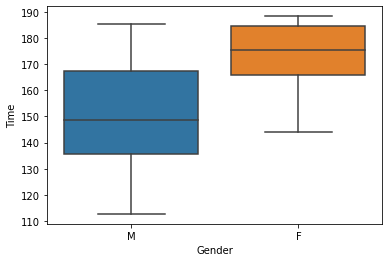

In [6]:
sns.boxplot(x = data['Gender'],y = data['Time']) 

Mediante los gráficos boxplot podemos apreciar que existe una diferencia en el tiempo requerido para realizar la actividad ya que en la media, Q1 y Q3 tienen un desfase en ambas muestras. Apreciamos que la mediana en los varones  cercano a los 150 en tiempo y en la mujer en 179. Mediante los bigotes también puede se puede apreciar que en el género masculino existe una mayor dispersión de los datos en comparación al género femenino. El valor mínimo en los valor en los varones es de 112 y en las mujeres el valor mínimo que el individuo utilizó para completar la actividad fue de 142. No existen puntos outlayer en ambas distribuciones. Un elemeto importante en la diferencia de las muetras es el IQR, en las mujeres el intervalo de tiempo donde se encuenta al 50 porciento de los datos es menor que al de los hombres. 

2. (2 pt) Escriba el código Python para construir un diagrama de líneas con barras de error (CI:
0.95) que muestre el género (Gender) en x y el tiempo de ejecución de la tarea (Time) en y.
Discuta: Observa diferencia en el tiempo de ejecución de la tarea en sistema (Time) por
los usuarios de acuerdo al género (Gender).

<AxesSubplot:xlabel='Gender', ylabel='Time'>

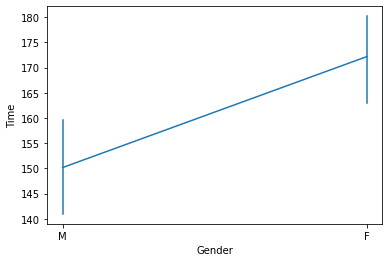

In [43]:
sns.lineplot(data= data,x='Gender', y = 'Time', err_style="bars", ci=95 , estimator ='mean')

Podemos apreciar que se han construido intervalos de confianza alrededor de la media, las dos muestras respecto al genero muestran una longitud similar en los intervalo. La prinicipal diferencia esta en la media, en el caso del genero masculino es de 150 y el el caso del genero femenino es de 172. Ademas con un Ci del 95% podemos ve que los intervalos no se solapan, por lo cual podrimaos decir que si existe un diferenca del tiempo de ejecucion de la activada de las mujeres respecto a los hombres.

In [40]:
data.groupby('Gender').describe()

SUS                                                     Time  \
       count    mean        std   min     25%   50%   75%   max count   
Gender                                                                  
F       10.0  74.000  17.328525  40.0  66.250  77.5  87.5  92.5  10.0   
M       20.0  77.125  13.432948  42.5  69.375  80.0  87.5  95.0  20.0   

                                                                   
           mean        std    min      25%     50%     75%    max  
Gender                                                             
F       172.190  15.656341  144.0  165.975  175.50  184.75  188.3  
M       150.155  21.893582  112.7  135.600  148.65  167.30  185.3

3. (2 pt) Escriba el código Python para construir un diagrama de densidad que muestre el
género (Gender) en x y el tiempo de ejecución de la tarea (Time) en y.
Discuta: Observa diferencia en el tiempo de ejecución de la tarea en sistema (Time) por
los usuarios de acuerdo al género (Gender).



<AxesSubplot:xlabel='Time', ylabel='Density'>

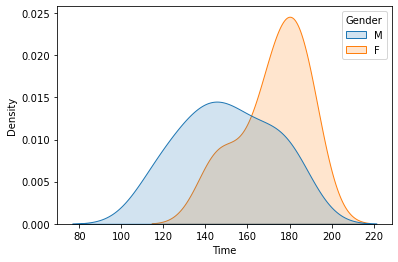

In [66]:

sns.kdeplot(data=data,x= 'Time',hue='Gender', fill=True, common_norm= False, alpha= 0.2)


A primera vista se pude obsevar que si existe una direncia entre la densidad de las dos muestras. En primer lugar la media de la poblacion masculona el menor que la la poblacion del genero femenino. Ademas existe una mayor dispecion de los datos y por lo tanto mayor desvias estandar en el genero masculino. 

4. (2 pt) Realice una prueba de dos varianzas para los grupos masculino y femenino (Gender).
Escriba (reutilce) el código Python.
Discuta los resultados.

In [68]:
# importamos distribución F
from scipy.stats import f

def f_test(*args, alpha=0.05, alternative='two-sided'):
    # *args: array o lista
    if len(args) == 2:
        x = np.array(args[0])
        y = np.array(args[1])
        dfx = x.size-1  # define grados de libertad del numerador 
        dfy = y.size-1  # define grados de libertad del denominador 
        fp = np.var(x, ddof=1)/np.var(y, ddof=1)  # calcula F test statistic 
    # *args: varianzas
    else:
        fp = args[0] / args[1]  # calcula F test statistic
        nx = args[2]
        ny = args[3]
        dfx = nx-1  # define grados de libertad del numerador
        dfy = ny-1  # define grados de libertad del denominador 
    
    alpha_c = alpha
    if alternative=='two-sided': alpha_c = alpha_c / 2
    f_critical = f.ppf(alpha_c, dfx, dfy), f.ppf(1-alpha_c, dfx, dfy)
    f_areas = f.cdf(fp, dfx, dfy), 1-f.cdf(fp, dfx, dfy)  # areas colas
    
    colas = {'less': {'p-value': f_areas[0], "f-value": f_critical[0]}, 
             'greater': {'p-value': f_areas[1], "f-value": f_critical[1]},
             'two-sided': {'p-value': min(f_areas)*2, "f-value": f_critical}
            }
    return {"F-test result": {"statistic": fp, 
                       "p-value": colas[alternative]['p-value']},
                       "f-value": colas[alternative]['f-value'],
                       "alpha": alpha}



In [69]:
masculino=data.query('Gender== "M"')['Time']
femenino= data.query('Gender== "F"')['Time']
f_test(masculino, femenino)

{'F-test result': {'statistic': 1.9554788086399444,
  'p-value': 0.3032106717119911},
 'f-value': (0.34721594741232176, 3.6833380832180525),
 'alpha': 0.05}

Con los resultados obtenidos en p value se pude observar que
$$ p−value>α $$
Por lo tanto con $ \alpha= 0.5$, no existe suficiente evidencia para descartar la hipotesis nula, es decir podemos considerar que las varianzas son iguales.

5.(2 pt) A partir de la prueba anterior realice una prueba de diferencias de medias para los
grupos masculino y femenino (Gender).
Escriba (reutilce) el código Python.
Discuta los resultados

In [72]:
from scipy.stats import ttest_ind

# filtramos datos
hombres = data[data['Gender']=='M']['Time']
mujeres = data[data['Gender']=='F']['Time']

mx = mujeres.mean()
my = hombres.mean()

# Asumimos varianzas iguales equal_var=True
# y prueba de dos colas alternative='two-sided'
# alternative: {'two-sided', 'less', 'greater'}
ttest_ind(mujeres, hombres, 
          equal_var=True, alternative='two-sided'), "Diferencia", mx - my


(Ttest_indResult(statistic=2.8304210808891264, pvalue=0.00850683391306472),
 'Diferencia',
 22.034999999999968)

Guiandonos en los resultados obtenido del p value 0.0085, podemos concluir que existen pruebas suficientes para reclazar la hipotesis nula. Por lo tanto, si existe deferencia entre las dos medias poblacionales. Mediante esta prueba hemos logrado demostras que si existe diferencias respecto al genero, en el tiempo utilizado para realizar la actividad en la consola.